# Задача классификации

Датасет был взят с https://www.kaggle.com/miroslavsabo/young-people-survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("responses.csv")

Посмотрим на наши атрибуты

In [3]:
data.head(2).T

,0,1
Music,5,4
Slow songs or fast songs,3,4
Dance,2,2
Folk,1,1
Country,2,1
...,...,...
Left - right handed,right handed,right handed
Education,college/bachelor degree,college/bachelor degree
Only child,no,no
Village - town,village,city


In [4]:
data.shape

(1010, 150)

Всего 1010 наблюдений по 150 атрибутам

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Проанализируем пропущенные значения

In [6]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False).loc[lambda x : x>0]


Weight                 1.980198
Height                 1.980198
Passive sport          1.485149
Chemistry              0.990099
Geography              0.891089
                         ...   
Storm                  0.099010
Opera                  0.099010
Thriller               0.099010
Musical instruments    0.099010
Law                    0.099010
Length: 144, dtype: float64

Атрибуты Weight и Height имеют меньше 2% пропущенных значений, удалим их

#### Удалим дубликаты если они есть

In [8]:
data = data[~data.duplicated()]
data.shape

(1010, 150)

### Выделим из 150 атрибутов только те которые на наш взягляд важны

In [9]:
data = data[["Happiness in life", "Age", "Height", "Gender", "Weight", 
              "Left - right handed", "Village - town", "Getting up", "God",
              "Health", "Borrowed stuff", "Self-criticism", "Elections", 
              "Smoking", "Alcohol" ,"Number of friends", "Spending on healthy eating",
              "Music", "Movies", "Friends versus money", "Changing the past"]]

Построим график распределения

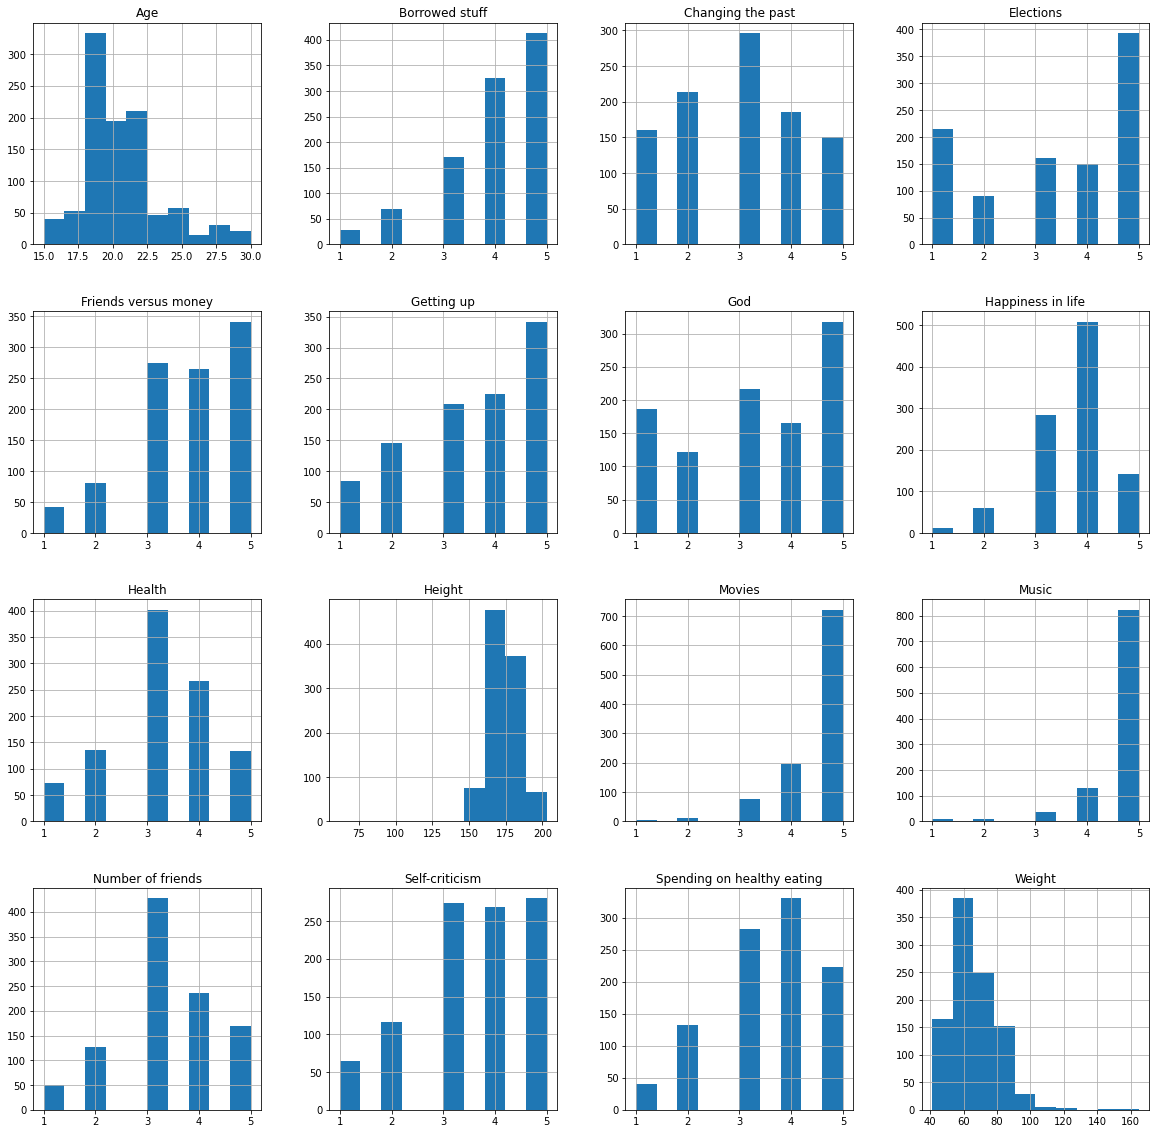

In [10]:
data.hist(figsize=(20, 20));

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 21 columns):
Happiness in life             1006 non-null float64
Age                           1003 non-null float64
Height                        990 non-null float64
Gender                        1004 non-null object
Weight                        990 non-null float64
Left - right handed           1007 non-null object
Village - town                1006 non-null object
Getting up                    1005 non-null float64
God                           1008 non-null float64
Health                        1009 non-null float64
Borrowed stuff                1008 non-null float64
Self-criticism                1005 non-null float64
Elections                     1007 non-null float64
Smoking                       1002 non-null object
Alcohol                       1005 non-null object
Number of friends             1010 non-null int64
Spending on healthy eating    1008 non-null float64
Music             

Определим столбцы по категориям

In [12]:
numerical = ['Age', 'Height', 'Weight']
target = ['Happiness in life']
categorical = [col for col in data.columns if col not in numerical+target]

In [13]:
categorical

['Gender',
 'Left - right handed',
 'Village - town',
 'Getting up',
 'God',
 'Health',
 'Borrowed stuff',
 'Self-criticism',
 'Elections',
 'Smoking',
 'Alcohol',
 'Number of friends',
 'Spending on healthy eating',
 'Music',
 'Movies',
 'Friends versus money',
 'Changing the past']

In [14]:
data[categorical].head()

,Gender,Left - right handed,Village - town,Getting up,God,Health,Borrowed stuff,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,female,right handed,village,2.0,1.0,1.0,4.0,1.0,4.0,never smoked,drink a lot,3,3.0,5.0,5.0,3.0,1.0
1,female,right handed,city,5.0,1.0,4.0,3.0,4.0,5.0,never smoked,drink a lot,3,2.0,4.0,5.0,4.0,4.0
2,female,right handed,city,4.0,5.0,2.0,2.0,4.0,5.0,tried smoking,drink a lot,3,2.0,5.0,5.0,5.0,5.0
3,female,right handed,city,1.0,4.0,1.0,5.0,5.0,5.0,former smoker,drink a lot,1,1.0,5.0,5.0,2.0,5.0
4,female,right handed,village,4.0,5.0,3.0,4.0,5.0,5.0,tried smoking,social drinker,3,4.0,5.0,5.0,3.0,4.0


Определим стобцы для one hot encoding

In [15]:
to_dummies = [
    'Gender',
    'Left - right handed',
    'Village - town',
    'Smoking',
    'Alcohol'
]

In [16]:
data_preprocessed = pd.get_dummies(data, columns=to_dummies, drop_first=True)

Удалим пропущенные значения

In [17]:
data_preprocessed.dropna(inplace=True)

In [18]:
data_preprocessed.shape

(942, 24)

### Выполним разбиение на трейн тест и  нормализацию непрерывных значений

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed.drop(target, axis=1), 
    data_preprocessed[target], 
    test_size=0.20, 
    random_state=42, 
    stratify=data_preprocessed[target]
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical])
X_test_scaled = scaler.transform(X_test[numerical])

X_train[numerical] = X_train_scaled
X_test[numerical] = X_test_scaled

Посмотрим нараспределение целевой переменной в трейн выборке

In [22]:
y_train['Happiness in life'].value_counts(normalize=True)

4.0    0.505976
3.0    0.280212
5.0    0.140770
2.0    0.059761
1.0    0.013280
Name: Happiness in life, dtype: float64

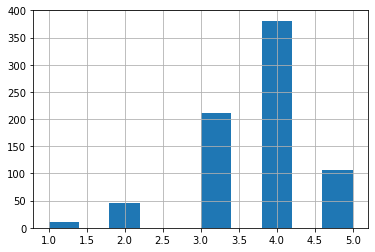

In [23]:
y_train['Happiness in life'].hist()

### Сделаем нивный baseline прогноз

Посколько целевая переменная не сбалансирована, учтем это при наивном прогнозе

In [24]:
y_naive_pred = np.random.choice(
    [4., 3., 5., 2., 1.], 
    len(y_test), 
    p=y_train['Happiness in life'].value_counts(normalize=True).values)

(array([  1.,   0.,  15.,   0.,   0.,  53.,   0., 101.,   0.,  19.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

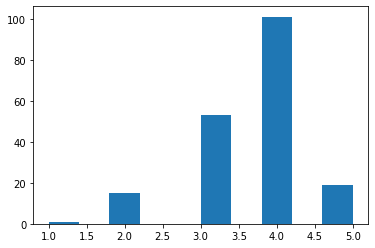

In [25]:
plt.hist(y_naive_pred)

Распределение прогнозного значения совпадает трейн выборкой

Посмотрим на точность прогнозирования наивного прогноза

In [26]:
print(classification_report(y_test, y_naive_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.07      0.09      0.08        11
         3.0       0.34      0.34      0.34        53
         4.0       0.55      0.58      0.57        96
         5.0       0.21      0.15      0.17        27

    accuracy                           0.42       189
   macro avg       0.23      0.23      0.23       189
weighted avg       0.41      0.42      0.41       189



Посмотрим на матрицу ошибок

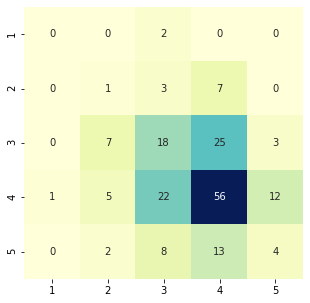

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_naive_pred)

conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

### Применим простую логистическую регрессию

In [30]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        11
         3.0       0.40      0.32      0.35        53
         4.0       0.57      0.78      0.66        96
         5.0       0.80      0.30      0.43        27

    accuracy                           0.53       189
   macro avg       0.35      0.28      0.29       189
weighted avg       0.52      0.53      0.50       189



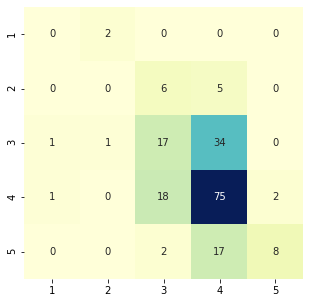

In [32]:
cm = confusion_matrix(y_test, log_reg.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False)

### Используем кросс-валидацию

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        11
         3.0       0.42      0.36      0.39        53
         4.0       0.57      0.79      0.66        96
         5.0       0.75      0.22      0.34        27

    accuracy                           0.53       189
   macro avg       0.35      0.27      0.28       189
weighted avg       0.51      0.53      0.49       189



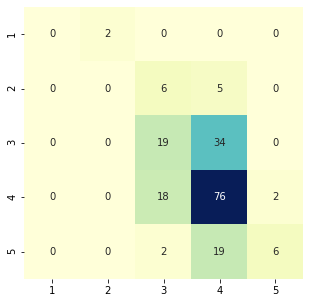

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

sfk = StratifiedKFold(n_splits=5)

logit_cv = LogisticRegressionCV(Cs=1000, cv=sfk, solver='lbfgs')

logit_cv.fit(X_train, y_train)

print(classification_report(y_test, logit_cv.predict(X_test)))

cm = confusion_matrix(y_test, logit_cv.predict(X_test))
conf_matrix = pd.DataFrame(data = cm, index=range(1, 6), columns=range(1, 6))
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

В результате мы построили модель классфикации уровня счастья.